In [5]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
import statsmodels.formula.api as smf
import statsmodels.api as sm
%precision 3
%matplotlib inline
from sklearn import linear_model

In [6]:
X = pd.read_csv('./data/7-3-1-large-data.csv')
X.head()

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,...,X_91,X_92,X_93,X_94,X_95,X_96,X_97,X_98,X_99,X_100
0,1.0000,0.5000,0.3333,0.2500,0.2000,0.1667,0.1429,0.1250,0.1111,0.1000,...,0.0110,0.0109,0.0108,0.0106,0.0105,0.0104,0.0103,0.0102,0.0101,0.0100
1,0.5000,0.3333,0.2500,0.2000,0.1667,0.1429,0.1250,0.1111,0.1000,0.0909,...,0.0109,0.0108,0.0106,0.0105,0.0104,0.0103,0.0102,0.0101,0.0100,0.0099
2,0.3333,0.2500,0.2000,0.1667,0.1429,0.1250,0.1111,0.1000,0.0909,0.0833,...,0.0108,0.0106,0.0105,0.0104,0.0103,0.0102,0.0101,0.0100,0.0099,0.0098
3,0.2500,0.2000,0.1667,0.1429,0.1250,0.1111,0.1000,0.0909,0.0833,0.0769,...,0.0106,0.0105,0.0104,0.0103,0.0102,0.0101,0.0100,0.0099,0.0098,0.0097
4,0.2000,0.1667,0.1429,0.1250,0.1111,0.1000,0.0909,0.0833,0.0769,0.0714,...,0.0105,0.0104,0.0103,0.0102,0.0101,0.0100,0.0099,0.0098,0.0097,0.0096


In [7]:
X -= sp.mean(X, axis=0)
X /= sp.std(X, ddof=1, axis=0)
X.head()

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,...,X_91,X_92,X_93,X_94,X_95,X_96,X_97,X_98,X_99,X_100
0,9.827551,8.123338,7.107514,6.429178,5.936848,5.560811,5.260877,5.012571,4.804730,4.628073,...,2.395703,2.400664,2.405248,2.353655,2.353977,2.353635,2.352574,2.349949,2.346481,2.342109
1,4.723539,5.238159,5.172311,4.999320,4.816384,4.644482,4.487096,4.347169,4.222510,4.109414,...,2.342291,2.346489,2.295335,2.297899,2.297454,2.296331,2.294476,2.291072,2.286814,2.281641
2,3.021861,3.796436,4.010725,4.047034,4.015571,3.955310,3.886227,3.815804,3.745195,3.676248,...,2.288879,2.238140,2.240379,2.242143,2.240932,2.239028,2.236378,2.232196,2.227148,2.221174
3,2.171533,2.931055,3.237109,3.366421,3.413279,3.420142,3.406396,3.380181,3.346558,3.311477,...,2.182055,2.183965,2.185423,2.186386,2.184409,2.181725,2.178281,2.173320,2.167482,2.160706
4,1.661131,2.354712,2.684193,2.854532,2.945578,2.992779,3.013021,3.016364,3.010863,2.998002,...,2.128643,2.129790,2.130467,2.130630,2.127886,2.124422,2.120183,2.114443,2.107815,2.100239


In [8]:
# 正規分布ノイズを含む応答変数
np.random.seed(1)
noise = sp.stats.norm.rvs(loc=0, scale=1, size=X.shape[0])

# 応答変数とX_1の関係
y = X.X_1 * 5 + noise

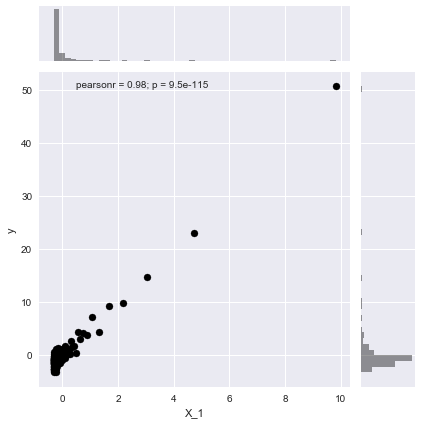

In [9]:
large_data = pd.concat([pd.DataFrame({"y":y}), X], axis=1)
sns.jointplot(y="y", x="X_1", data=large_data, color="black")

# Ridge回帰

In [10]:
# sklearn
lm_sklearn = linear_model.LinearRegression()
lm_sklearn.fit(X, y)
lm_sklearn.coef_

array([ 1.476e+01, -8.746e+01,  2.117e+02, -9.415e+01, -6.817e+01,
       -9.284e+01,  1.761e+00,  8.170e+01,  6.680e+01,  2.788e+01,
       -3.288e+01,  6.818e+01, -1.699e+01,  2.208e+01, -4.855e+01,
       -3.390e+01, -4.536e+01,  9.728e+00,  2.481e+01,  1.858e+00,
        1.599e+00, -2.838e+01,  6.477e+00, -5.980e+01,  3.532e+01,
       -1.302e+01,  4.108e+01, -4.303e+01,  5.247e+01,  1.920e+00,
        3.342e+01,  8.490e+00,  8.329e+00, -2.293e+01, -3.577e+01,
       -1.337e+01,  3.178e+01, -2.018e+01, -2.654e+01, -3.523e+01,
        1.927e+01,  4.823e+01, -1.655e+00,  5.749e-01, -1.893e+01,
        7.370e-01,  1.047e+01, -7.732e+00, -1.854e+00, -2.559e-01,
       -5.045e+00, -4.227e+00,  2.523e+01,  1.616e+01, -1.310e+01,
        6.455e+00, -1.332e+01, -2.291e+01, -1.202e+01,  7.745e+00,
        1.755e+01,  5.997e+00,  4.648e+00,  4.120e+00, -1.825e+00,
        5.366e+00,  4.546e+00, -2.598e+00, -4.091e+00,  7.496e+00,
        3.100e+01,  1.530e+01, -5.323e+00, -1.509e+01, -3.801e

In [11]:
# Ridge回帰 正則化係数αの影響
n_alphas = 50
ridge_alphas = np.logspace(-2, 0.7, n_alphas)
sp.log10(ridge_alphas)

array([-2.   , -1.945, -1.89 , -1.835, -1.78 , -1.724, -1.669, -1.614,
       -1.559, -1.504, -1.449, -1.394, -1.339, -1.284, -1.229, -1.173,
       -1.118, -1.063, -1.008, -0.953, -0.898, -0.843, -0.788, -0.733,
       -0.678, -0.622, -0.567, -0.512, -0.457, -0.402, -0.347, -0.292,
       -0.237, -0.182, -0.127, -0.071, -0.016,  0.039,  0.094,  0.149,
        0.204,  0.259,  0.314,  0.369,  0.424,  0.48 ,  0.535,  0.59 ,
        0.645,  0.7  ])

In [14]:
ridge_coefs = []
for a in ridge_alphas:
    ridge = linear_model.Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X, y)
    ridge_coefs.append(ridge.coef_)

In [15]:
ridge_coefs = np.array(ridge_coefs)
ridge_coefs.shape

(50, 100)

Text(0,0.5,'Coefficients')

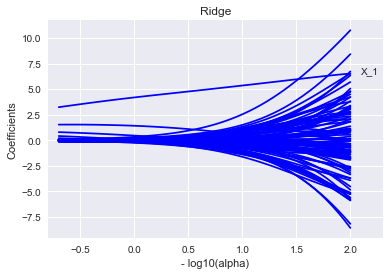

In [21]:
log_alphas = -sp.log10(ridge_alphas)
plt.plot(log_alphas, ridge_coefs, color='blue')
plt.text(max(log_alphas) + 0.1, np.array(ridge_coefs)[0,0], "X_1")
plt.xlim([min(log_alphas) - 0.1, max(log_alphas) + 0.3])
plt.title("Ridge")
plt.xlabel('- log10(alpha)')
plt.ylabel('Coefficients')

In [22]:
# Ridge回帰　最適な正則化の強度の決定
ridge_best = linear_model.RidgeCV(cv=10,
                                 alphas=ridge_alphas,
                                 fit_intercept=False)

In [23]:
ridge_best.fit(X, y)
# 最適な-log10(a)
-sp.log10(ridge_best.alpha_)

0.237

In [24]:
# 最適なα
ridge_best.alpha_

0.580

In [25]:
ridge_best.coef_

array([ 4.463,  1.288,  0.293, -0.091, -0.201, -0.233, -0.215, -0.206,
       -0.145, -0.135, -0.155, -0.046, -0.097, -0.017, -0.11 , -0.012,
       -0.094,  0.013, -0.018, -0.031,  0.025, -0.029,  0.043, -0.087,
        0.127,  0.021,  0.055, -0.077,  0.141, -0.007,  0.099,  0.116,
       -0.044,  0.037, -0.034,  0.015,  0.123, -0.171, -0.007, -0.182,
        0.09 ,  0.222,  0.035, -0.032, -0.008,  0.025,  0.338, -0.193,
       -0.108,  0.212, -0.128, -0.246,  0.249,  0.128, -0.155,  0.27 ,
        0.03 , -0.165, -0.178,  0.158, -0.011,  0.013,  0.194,  0.134,
       -0.156, -0.018,  0.256,  0.223, -0.185,  0.006,  0.535,  0.181,
       -0.348, -0.123,  0.226, -0.043, -0.115, -0.053,  0.209,  0.189,
       -0.042, -0.205, -0.099,  0.059, -0.224,  0.15 , -0.039, -0.113,
        0.21 ,  0.012,  0.129, -0.032, -0.022, -0.229, -0.198,  0.245,
       -0.305, -0.396, -0.163,  0.164])

In [29]:
resid = y - ridge_best.predict(X)
print(resid)
resid_sum = sp.sum(resid)
print(resid_sum)

0      0.893039
1     -0.916096
2     -0.394635
3     -0.691704
4      1.321010
5     -1.812722
6      2.222648
7     -0.297164
8      0.729379
9      0.121946
10     1.831279
11    -1.695956
12    -0.030918
13    -0.149876
14     1.366003
15    -0.870255
16     0.010984
17    -0.706290
18     0.170287
19     0.690068
20    -0.987780
21     1.228533
22     0.951318
23     0.576490
24     0.956937
25    -0.657016
26    -0.071706
27    -0.872285
28    -0.253769
29     0.511529
         ...   
120   -0.028543
121   -0.776304
122    1.188447
123    1.872414
124   -1.857262
125    1.217109
126    1.526672
127    0.275730
128   -1.227807
129    0.817774
130   -0.247678
131   -0.644809
132   -1.259737
133    0.475600
134    0.722858
135   -0.686710
136    0.497069
137   -1.172303
138    0.713111
139   -0.032178
140   -0.216693
141   -0.103826
142    0.825583
143    0.660993
144    0.441727
145    0.106321
146    0.039495
147    0.562414
148    0.161846
149    0.617302
Name: X_1, Length: 150, 

# Lasso回帰

In [34]:
lasso_alphas, lasso_coefs, _ = linear_model.lasso_path(X, y, fit_intercept=False)

Text(0,0.5,'Coefficients')

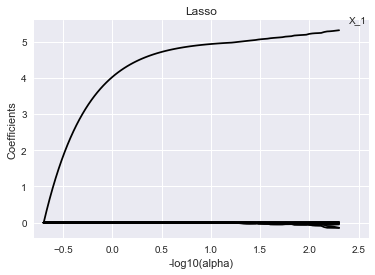

In [38]:
log_alphas = -sp.log10(lasso_alphas)
plt.plot(log_alphas, lasso_coefs.T, color='black') # lasso_coefs.shape: [回帰係数, alphaの種類]
plt.text(max(log_alphas) + 0.1, np.array(ridge_coefs)[0,0] - 1.0, "X_1")
plt.xlim([min(log_alphas) - 0.1, max(log_alphas) + 0.3])
plt.title("Lasso")
plt.xlabel("-log10(alpha)")
plt.ylabel("Coefficients")

In [39]:
# CVで最適なLasso回帰の正規化係数を求める
lasso_best = linear_model.LassoCV(cv=10, alphas=lasso_alphas, fit_intercept=False)
lasso_best.fit(X, y)
-sp.log10(lasso_best.alpha_)

2.301

In [40]:
lasso_best.alpha_

0.005

In [41]:
lasso_best.coef_

array([ 5.336e+00, -0.000e+00, -0.000e+00, -3.043e-01, -4.121e-02,
       -0.000e+00, -0.000e+00, -0.000e+00, -0.000e+00, -0.000e+00,
       -0.000e+00, -0.000e+00, -0.000e+00, -0.000e+00, -0.000e+00,
       -0.000e+00, -0.000e+00, -0.000e+00, -0.000e+00, -0.000e+00,
       -0.000e+00, -0.000e+00, -0.000e+00, -0.000e+00, -0.000e+00,
       -0.000e+00, -0.000e+00, -0.000e+00,  0.000e+00, -0.000e+00,
        0.000e+00,  0.000e+00, -0.000e+00,  0.000e+00,  0.000e+00,
        0.000e+00,  0.000e+00, -0.000e+00,  0.000e+00,  0.000e+00,
        0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,
        0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,
        0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,
        0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,
        0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,
        0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,
        8.425e-03,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e